In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore", category=FutureWarning)
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
"""from mlxtend.classifier import StackingClassifier"""

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

C:\Users\sanjana\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sanjana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows


In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM();", conn_r)
        conn_r.commit()
        conn_r.close()

In [0]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [0]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.199996000079998,0.166663888935184,0.0,0.0,0.14285510206997,0.0999990000099999,0.0,0.0,3.0,8.5,...,-0.452613651752472,15.652570605278,6.08213365077972,-11.8397651314735,13.1632919311523,-2.98961134254932,-22.7671056985855,-0.55659094452858,16.7820047736168,20.3098403215408
2,0.399992000159997,0.399992000159997,0.499987500312492,0.499987500312492,0.444439506227709,0.444439506227709,0.0,0.0,0.0,9.0,...,-7.29706252366304,8.17464561760426,11.8678730130196,-0.180742904543877,-7.7285645082593,-1.18125408887863,-10.2087883651257,1.95615618489683,5.9711550520733,-0.634018301963806
3,0.833319444675922,0.714275510349852,0.999983333611106,0.857130612419823,0.687495703151855,0.687495703151855,0.0,1.0,0.0,16.0,...,10.6274425089359,8.40339290164411,14.16905092448,-14.7492953687906,13.0176268517971,15.6888161092065,-26.4774019122124,24.7521114945412,14.29726113379,0.945210464298725
4,0.0,0.0,0.599988000239995,0.499991666805553,0.249997916684028,0.230767455634957,0.0,0.0,1.0,12.5,...,9.43481918051839,47.0162477493286,6.11483122035861,-9.12068559974432,-3.70159254875034,-6.60001696646214,-26.1024898421019,13.254497602582,10.0541534200311,-6.71233975887299
5,0.749981250468738,0.749981250468738,0.499987500312492,0.499987500312492,0.624992187597655,0.624992187597655,1.0,0.0,0.0,8.0,...,-0.158434137701988,13.7061135396361,6.35377380251884,-7.79693192709237,7.42785215843469,0.602214589715004,-17.1489275898784,-1.66515278816223,4.06413406133652,3.87387558817863


<h2> 4.2 Converting strings to numerics </h2>

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

### Limiting data to 80000 data points due to system constrain 

In [2]:
# avoid decoding problems
df = pd.read_csv("train.csv").iloc[:80000]

# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1').iloc[:80000]
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1').iloc[:80000]
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [5]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)

df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3 = df.drop(['qid1', 'qid2',"is_duplicate"],axis=1)

df1  = df1.merge(df2, on='id',how='left')

df  = df1.merge(df3, on='id',how='left')

In [6]:
df.columns

Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'question1',
       'question2'],
      dtype='object')

In [7]:
df.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,question1,question2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,57,14,12,10.0,23.0,0.434783,2,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,88,8,13,4.0,20.0,0.200000,5,3,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,59,14,10,4.0,24.0,0.166667,2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,65,11,9,0.0,19.0,0.000000,2,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,39,13,7,2.0,20.0,0.100000,4,2,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [8]:
X=df.drop(columns=["is_duplicate"])
Y=df["is_duplicate"]

<h2> Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [9]:
# splitting data into train and test
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

In [10]:
stopword = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Creating tfidf vector

In [11]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(X_train['question1'])

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [13]:
def tf_idf_W2V(question):
    vec1 = []
    for qu1 in (question): # for each question
        vector = np.zeros(300) # as word vectors are of zero length
        for word in qu1.split(): # for each word in a review/sentence
            if word in glove_words and word in word2tfidf.keys():
                vector += word2tfidf.get(word)*model[word]
        vec1.append(np.array(vector))
    return (vec1)

In [14]:
x_train_q1n= tf_idf_W2V(X_train['question1'])
x_test_q1n= tf_idf_W2V(X_test['question1'])

In [15]:
questions = list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [16]:
x_train_q2n= tf_idf_W2V(X_train['question2'])
x_test_q2n= tf_idf_W2V(X_test['question2'])

In [17]:
train  = np.hstack((np.array(X_train.drop(['question1','question2'],axis = 1)),x_train_q1n,x_train_q2n,np.array(Y_train).reshape(-1,1)))
test  = np.hstack((np.array(X_test.drop(['question1','question2'],axis = 1)),x_test_q1n,x_test_q2n,np.array(Y_test).reshape(-1,1)))

In [18]:
X_train = train[:,1:-1]
X_test = test[:,1:-1]
y_train = train[:,-1]
y_test = test[:,-1]
print("X_train shape : {} \nX_test shape : {} \nY_train shape : {} \nY_test shape : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape : (64000, 626) 
X_test shape : (16000, 626) 
Y_train shape : (64000,) 
Y_test shape : (16000,)


In [19]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(np.array(y_train))
train_len = y_train.shape[0]
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(np.array(y_test))
test_len = y_test.shape[0]
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6270625 Class 1:  0.3729375
---------- Distribution of output variable in train data ----------
Class 0:  0.629125 Class 1:  0.370875


In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8893959469057441


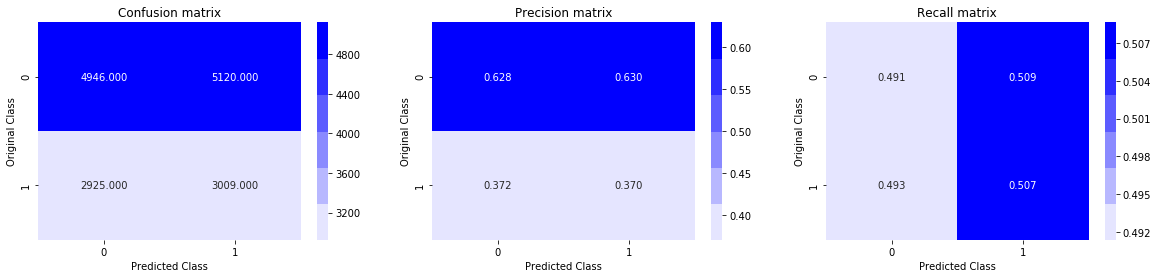

In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.48269013481602346
For values of alpha =  0.0001 The log loss is: 0.4658901608876903
For values of alpha =  0.001 The log loss is: 0.4720093905774423
For values of alpha =  0.01 The log loss is: 0.4680554444116308
For values of alpha =  0.1 The log loss is: 0.4707846899229054
For values of alpha =  1 The log loss is: 0.4724531981833723
For values of alpha =  10 The log loss is: 0.5176602129670514


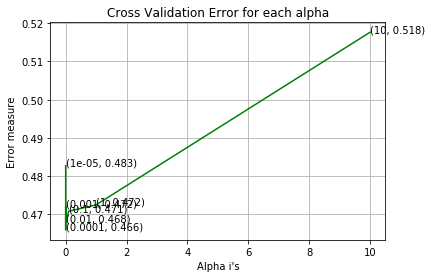

For values of best alpha =  0.0001 The train log loss is: 0.46408725600760187
For values of best alpha =  0.0001 The test log loss is: 0.4658901608876903
Total number of data points : 16000


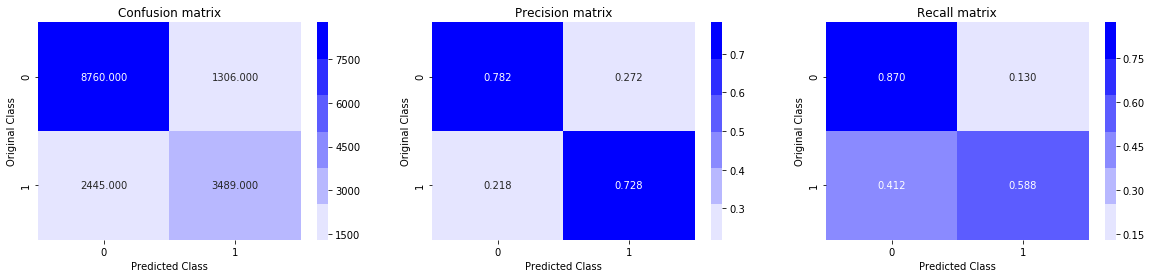

In [23]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.448520579258679
For values of alpha =  0.0001 The log loss is: 0.4577343656494128
For values of alpha =  0.001 The log loss is: 0.47546159638382746
For values of alpha =  0.01 The log loss is: 0.524062559328877
For values of alpha =  0.1 The log loss is: 0.5613780728934776
For values of alpha =  1 The log loss is: 0.5999245089322153
For values of alpha =  10 The log loss is: 0.6295883214662134


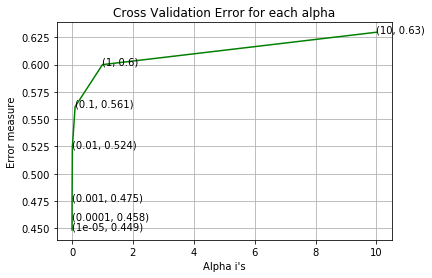

For values of best alpha =  1e-05 The train log loss is: 0.44705790696531367
For values of best alpha =  1e-05 The test log loss is: 0.448520579258679
Total number of data points : 16000


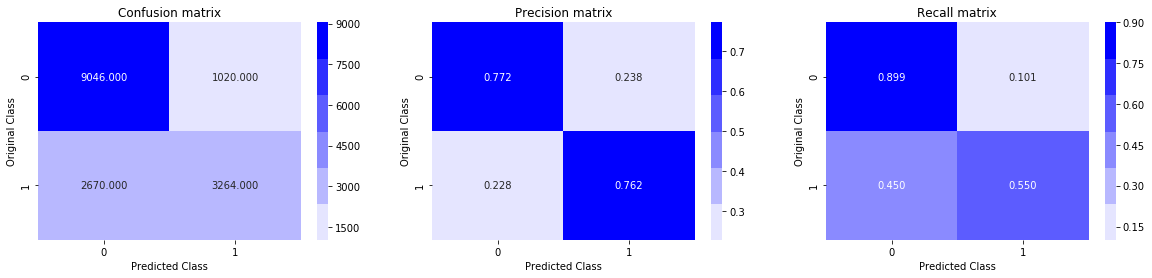

In [24]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [25]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684787	valid-logloss:0.684832
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615486	valid-logloss:0.616016
[20]	train-logloss:0.564515	valid-logloss:0.565695
[30]	train-logloss:0.526058	valid-logloss:0.527873
[40]	train-logloss:0.496398	valid-logloss:0.498619
[50]	train-logloss:0.473402	valid-logloss:0.475943
[60]	train-logloss:0.45521	valid-logloss:0.458165
[70]	train-logloss:0.440304	valid-logloss:0.443708
[80]	train-logloss:0.42845	valid-logloss:0.43232
[90]	train-logloss:0.418545	valid-logloss:0.422838
[100]	train-logloss:0.410439	valid-logloss:0.415189
[110]	train-logloss:0.403663	valid-logloss:0.408896
[120]	train-logloss:0.397854	valid-logloss:0.40356
[130]	train-logloss:0.392872	valid-logloss:0.39893
[140]	train-logloss:0.388516	valid-logloss:0.395024
[150]	train-logloss:0.384847	valid-logloss:0.391844
[160]	train-logloss:0.381727	vali

Total number of data points : 16000


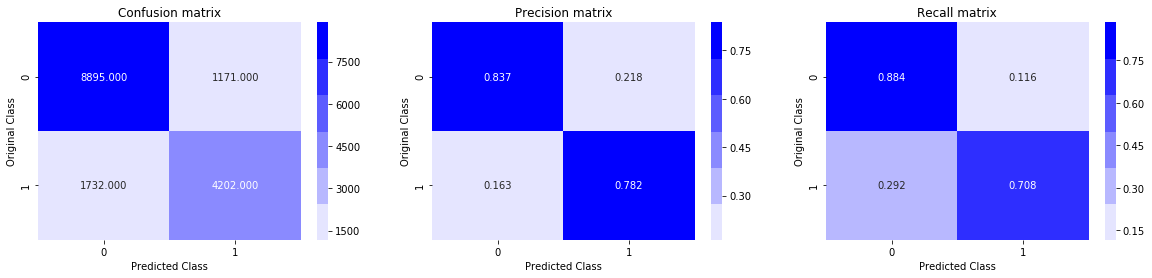

In [26]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


### Limiting data to 80000 data points due to system constrain 

In [26]:
# avoid decoding problems
df = pd.read_csv("train.csv").iloc[:80000]

# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [28]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1').iloc[:80000]
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1').iloc[:80000]
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [29]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)

df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3 = df.drop(['qid1', 'qid2',"is_duplicate"],axis=1)

df1  = df1.merge(df2, on='id',how='left')

df  = df1.merge(df3, on='id',how='left')

In [30]:
df.columns

Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'question1',
       'question2'],
      dtype='object')

In [31]:
df.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,question1,question2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,57,14,12,10.0,23.0,0.434783,2,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,88,8,13,4.0,20.0,0.200000,5,3,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,59,14,10,4.0,24.0,0.166667,2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,65,11,9,0.0,19.0,0.000000,2,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,39,13,7,2.0,20.0,0.100000,4,2,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [32]:
X=df.drop(columns=["is_duplicate"])
Y=df["is_duplicate"]

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [33]:
# splitting data into train and test
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

In [34]:
stopword = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Creating tfidf vector

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True,min_df = 10,stop_words=stopword)
q1_tf_idf_train = tfidf.fit_transform(X_train['question1'])

q1_tf_idf_test = tfidf.transform(X_test['question1'])
print("tf_idf_q1 train shape : {}\ntf_idf_q1 test shape : {}".format(q1_tf_idf_train.shape,q1_tf_idf_test.shape))

tf_idf_q1 train shape : (64000, 4793)
tf_idf_q1 test shape : (16000, 4793)


In [36]:
tfidf = TfidfVectorizer(lowercase=True,min_df = 10,stop_words=stopword)
q2_tf_idf_train = tfidf.fit_transform(X_train['question2'])

q2_tf_idf_test = tfidf.transform(X_test['question2'])
print("tf_idf_q2 train shape : {}\ntf_idf_q2 test shape : {}".format(q2_tf_idf_train.shape,q2_tf_idf_test.shape))

tf_idf_q2 train shape : (64000, 4748)
tf_idf_q2 test shape : (16000, 4748)


In [37]:
train  = np.hstack((np.array(X_train.drop(['question1','question2'],axis = 1)),q1_tf_idf_train.todense(),q2_tf_idf_train.todense(),np.array(Y_train).reshape(-1,1)))
test  = np.hstack((np.array(X_test.drop(['question1','question2'],axis = 1)),q1_tf_idf_test.todense(),q2_tf_idf_test.todense(),np.array(Y_test).reshape(-1,1)))

In [39]:
X_train = train[:,1:-1]
X_test = test[:,1:-1]
y_train = train[:,-1]
y_test = test[:,-1]
print("X_train shape : {} \nX_test shape : {} \nY_train shape : {} \nY_test shape : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape : (64000, 9567) 
X_test shape : (16000, 9567) 
Y_train shape : (64000, 1) 
Y_test shape : (16000, 1)


In [40]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(np.array(y_train)[:,0])
train_len = y_train.shape[0]
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter((np.array(y_test)[:,0]))
test_len = y_test.shape[0]
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6270625 Class 1:  0.3729375
---------- Distribution of output variable in train data ----------
Class 0:  0.629125 Class 1:  0.370875


In [41]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 5.1 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8887451006892967


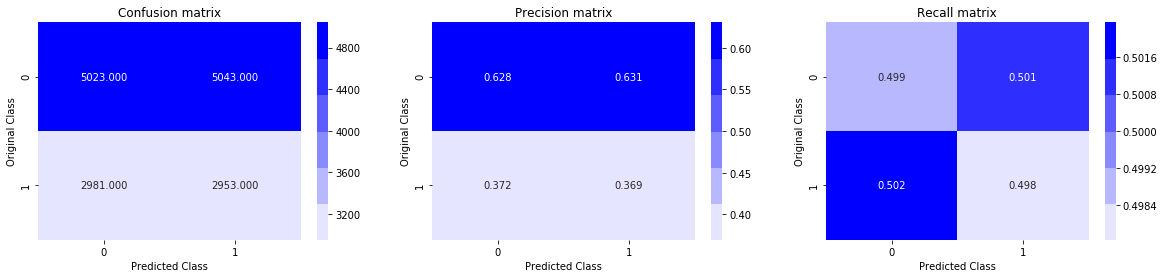

In [42]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 5.2 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.44513313957044337
For values of alpha =  0.0001 The log loss is: 0.44017768527143414
For values of alpha =  0.001 The log loss is: 0.43937427395165596
For values of alpha =  0.01 The log loss is: 0.43809844275361454
For values of alpha =  0.1 The log loss is: 0.4452901447656233
For values of alpha =  1 The log loss is: 0.4839921185512748
For values of alpha =  10 The log loss is: 0.5430411159568478


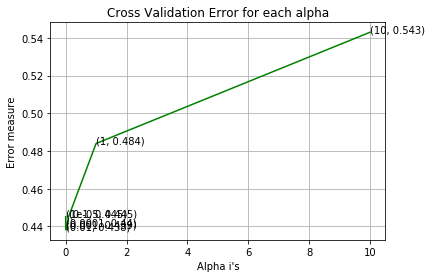

For values of best alpha =  0.01 The train log loss is: 0.4395703593754683
For values of best alpha =  0.01 The test log loss is: 0.43809844275361454
Total number of data points : 16000


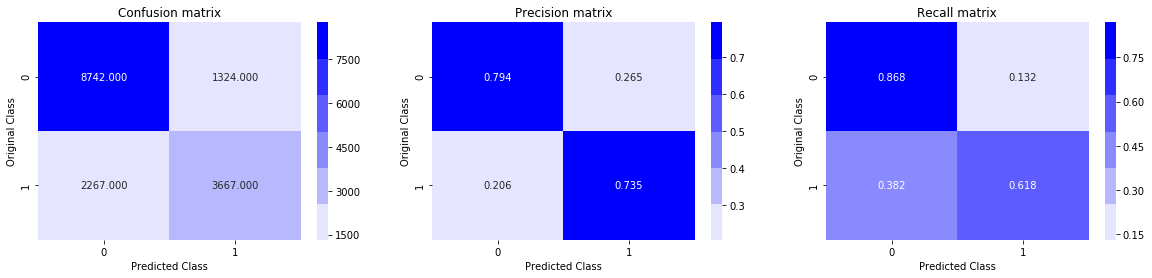

In [43]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 5.3 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.46724326710654684
For values of alpha =  0.0001 The log loss is: 0.493481316911782
For values of alpha =  0.001 The log loss is: 0.5018001685956966
For values of alpha =  0.01 The log loss is: 0.508359586626663
For values of alpha =  0.1 The log loss is: 0.49103999689476696
For values of alpha =  1 The log loss is: 0.5768585789697419
For values of alpha =  10 The log loss is: 0.6404622026525303


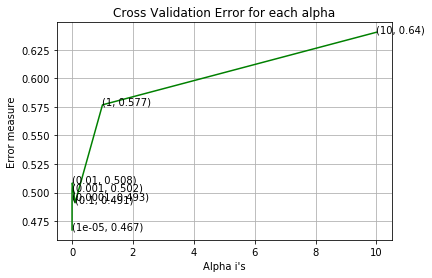

For values of best alpha =  1e-05 The train log loss is: 0.46870627684631166
For values of best alpha =  1e-05 The test log loss is: 0.46724326710654684
Total number of data points : 16000


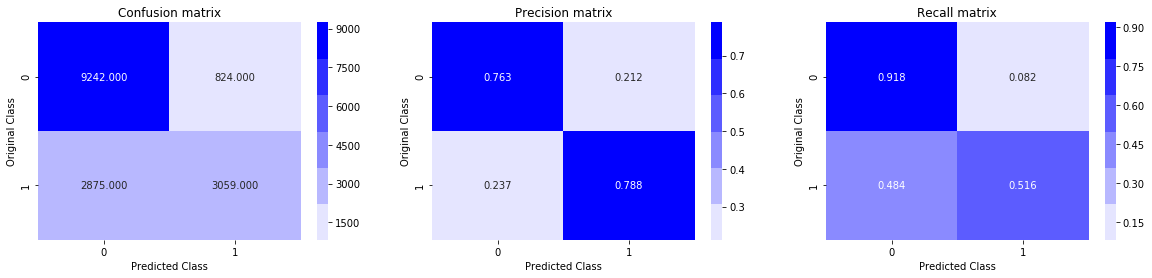

In [47]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 5.4 XGBoost </h2>

#### XGBoost on TFIDF weighted W2V 

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {}
params['max_depth'] = [4,6,8,10,15]
params['n_estimators'] = [100,300,400,500,600]

XGB = XGBClassifier(objective='binary:logistic', learning_rate = 0.02,n_jobs=-1)
random_search = RandomizedSearchCV(XGB, param_distributions= params, n_jobs=-1, cv=4,return_train_score=True,scoring = "neg_log_loss")

random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300, 400, 500, 600], 'max_depth': [4, 6, 8, 10, 15]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=0)

In [25]:
random_search.cv_results_

{'mean_fit_time': array([11049.01901817,  5267.28236622,  5171.78511018,  4141.56640488,
         1420.75337404,  2167.6167807 ,  3073.57932901,  7243.322842  ,
         2343.33797354,   690.10112667]),
 'mean_score_time': array([8.00011444, 2.96736312, 2.42353451, 2.07888556, 1.31843811,
        1.37229913, 1.70462251, 1.42464215, 1.52416593, 0.94391042]),
 'mean_test_score': array([-0.35001837, -0.32950978, -0.32929357, -0.33314519, -0.36322522,
        -0.34726706, -0.33812811, -0.33010756, -0.34976523, -0.39348532]),
 'mean_train_score': array([-0.01628041, -0.11418908, -0.1733013 , -0.16109118, -0.35332335,
        -0.31049261, -0.24531232, -0.05616422, -0.32912545, -0.38118592]),
 'param_max_depth': masked_array(data=[15, 10, 8, 10, 4, 6, 8, 10, 4, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 400, 500, 300, 300, 3

In [26]:
from prettytable import PrettyTable
x = PrettyTable()
ls = list(random_search.cv_results_["params"][0].keys())
ls.extend(["train","test"])
x.field_names = ls
for ind,val in enumerate(random_search.cv_results_["params"]):
    ls = list(val.values())
    ls.extend([random_search.cv_results_["mean_train_score"][ind],random_search.cv_results_["mean_test_score"][ind]])
    x.add_row(ls)
print(x)

+--------------+-----------+----------------------+----------------------+
| n_estimators | max_depth |        train         |         test         |
+--------------+-----------+----------------------+----------------------+
|     500      |     15    | -0.01628041072072752 | -0.3500183660512089  |
|     400      |     10    | -0.11418908143927775 | -0.3295097785611338  |
|     500      |     8     | -0.17330130165174917 | -0.3292935661102129  |
|     300      |     10    | -0.16109118028974867 | -0.33314519411951915 |
|     300      |     4     | -0.3533233493169028  | -0.3632252246200096  |
|     300      |     6     | -0.3104926074829606  | -0.3472670558358659  |
|     300      |     8     | -0.24531232109712314 | -0.3381281085669798  |
|     600      |     10    | -0.05616422188136251 |  -0.330107560638109  |
|     500      |     4     | -0.3291254452878384  | -0.34976522922814185 |
|     100      |     6     | -0.38118592430371795 | -0.3934853209254798  |
+--------------+---------

In [27]:
#finding which paramater gives less log loss
min_loss_ind = np.argmin(random_search.cv_results_["mean_train_score"])

best_max_depth = random_search.cv_results_["params"][min_loss_ind]['max_depth'] 
best_n_estimators = random_search.cv_results_["params"][min_loss_ind]['n_estimators'] 
print("best_max_depth : {}\nbest_n_estimators : {}".format(best_max_depth,best_n_estimators))

best_max_depth : 6
best_n_estimators : 100


In [28]:
XGB = XGBClassifier(objective='binary:logistic',learning_rate = 0.02,n_jobs=-1, max_depth = best_max_depth ,n_estimators = best_n_estimators  )
XGB.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(XGB, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y, labels=XGB.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=XGB.classes_, eps=1e-15))

The train log loss is: 0.3539402964419956
The test log loss is: 0.3758326435069845


Total number of data points : 16000


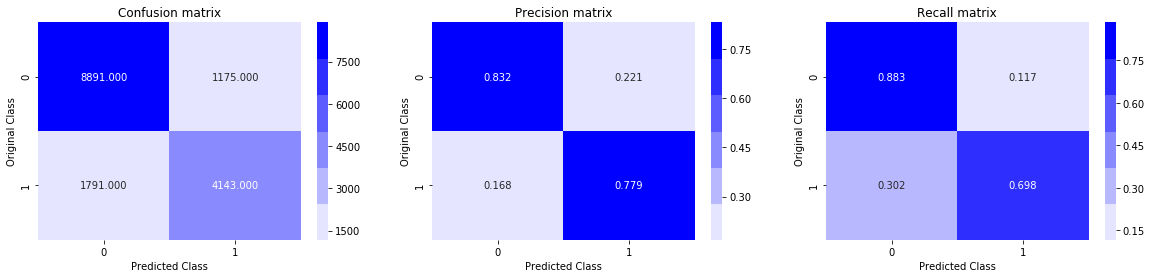

In [30]:
predicted_y = sig_clf.predict(X_test)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Conclusion:

In [2]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Hyper paramater","Train AUC","Test AUC"]
x.add_row(["TFIDF_Weighted_W2V","Random model","None","None",0.8893])
x.add_row(["TFIDF_Weighted_W2V","Logistic Regression","alpha - 0.0001",0.4640,0.4658])
x.add_row(["TFIDF_Weighted_W2V","Linear SVM","alpha - 0.00001",0.4470,0.4485])
x.add_row(["TFIDF_Weighted_W2V","XGBoost","max_depth - 4",0.3428,0.3600])
print(x)

+--------------------+---------------------+-----------------+-----------+----------+
|     Vectorizer     |        Model        | Hyper paramater | Train AUC | Test AUC |
+--------------------+---------------------+-----------------+-----------+----------+
| TFIDF_Weighted_W2V |     Random model    |       None      |    None   |  0.8893  |
| TFIDF_Weighted_W2V | Logistic Regression |  alpha - 0.0001 |   0.464   |  0.4658  |
| TFIDF_Weighted_W2V |      Linear SVM     | alpha - 0.00001 |   0.447   |  0.4485  |
| TFIDF_Weighted_W2V |       XGBoost       |  max_depth - 4  |   0.3428  |   0.36   |
+--------------------+---------------------+-----------------+-----------+----------+


In [3]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Hyper paramater-1","Hyper paramater-2","Train AUC","Test AUC"]
x.add_row(["TFIDF_Weighted_W2V","XGBoost - Hyper Paramater","max_depth - 6","n_estimators- 100",0.3539, 0.3758])
print(x)

+--------------------+---------------------------+-------------------+-------------------+-----------+----------+
|     Vectorizer     |           Model           | Hyper paramater-1 | Hyper paramater-2 | Train AUC | Test AUC |
+--------------------+---------------------------+-------------------+-------------------+-----------+----------+
| TFIDF_Weighted_W2V | XGBoost - Hyper Paramater |   max_depth - 6   | n_estimators- 100 |   0.3539  |  0.3758  |
+--------------------+---------------------------+-------------------+-------------------+-----------+----------+


In [4]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Hyper paramater","Train AUC","Test AUC"]
x.add_row(["TFIDF Vectors","Random model","None","None", 0.8887])
x.add_row(["TFIDF Vectors","Logistic Regression","alpha - 0.01",0.4395,0.4380])
x.add_row(["TFIDF Vectors","Linear SVM","alpha - 0.00001",0.4687,0.4672])
print(x)

+---------------+---------------------+-----------------+-----------+----------+
|   Vectorizer  |        Model        | Hyper paramater | Train AUC | Test AUC |
+---------------+---------------------+-----------------+-----------+----------+
| TFIDF Vectors |     Random model    |       None      |    None   |  0.8887  |
| TFIDF Vectors | Logistic Regression |   alpha - 0.01  |   0.4395  |  0.438   |
| TFIDF Vectors |      Linear SVM     | alpha - 0.00001 |   0.4687  |  0.4672  |
+---------------+---------------------+-----------------+-----------+----------+
